In [64]:
# Import library yang dibutuhkan

import pandas as pd
import numpy as np
from numpy import mean, std, percentile, isnan
from numpy.random import seed, randn
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error

In [65]:
# Memuat data
df = pd.read_csv('south.csv')

# Rename table name

# from
CONTENTS = [
    "Index",
    "Date (YYYY-MM-DD)",
    "Time (HH:00)",
    "Amount of precipitation in millimetres (last hour)",
    "Atmospheric pressure at station level (mb)",
    "Maximum air pressure for the last hour (mb)",
    "Minimum air pressure for the last hour (mb)",
    "Solar radiation (KJ/m2)",
    "Air temperature (instant) (°c)",
    "Dew point temperature (instant) (°c)",
    "Maximum temperature for the last hour (°c)",
    "Minimum temperature for the last hour (°c)",
    "Maximum dew point temperature for the last hour (°c)",
    "Minimum dew point temperature for the last hour (°c)",
    "Maximum relative humid temperature for the last hour (%)",
    "Minimum relative humid temperature for the last hour (%)",
    "Relative humid (% instant)",
    "Wind direction (radius degrees (0-360))",
    "Wind gust in metres per second",
    "Wind speed in metres per second",
    "Brazilian geopolitical regions",
    "State (Province)",
    "Station Name (usually city location or nickname)",
    "Station code (INMET number)",
    "Latitude",
    "Longitude",
    "Elevation"
]
# to
rename_columns = [
    "Index",
    "Date",
    "Time",
    "Precipitation",
    "Pressure",
    "Pressure_max",
    "Pressure_min",
    "Solar_radiation",
    "Air_temp",
    "Dew_point_temp",
    "Temp_max",
    "Temp_min",
    "Dew_max",
    "Dew_min",
    "Humid_max",
    "Humid_min",
    "Relative_humid",
    "Wind_direction",
    "Wind_gust",
    "Wind_speed",
    "Regions",
    "State",
    "Station_name",
    "Station_code",
    "Latitute",
    "Longitude",
    "Elevation"
]

df.columns = rename_columns
df = df.iloc[1: , :]

# Inspeksi awal
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10284887 entries, 1 to 10284887
Data columns (total 27 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Index            int64  
 1   Date             object 
 2   Time             object 
 3   Precipitation    float64
 4   Pressure         float64
 5   Pressure_max     float64
 6   Pressure_min     float64
 7   Solar_radiation  int64  
 8   Air_temp         float64
 9   Dew_point_temp   float64
 10  Temp_max         float64
 11  Temp_min         float64
 12  Dew_max          float64
 13  Dew_min          float64
 14  Humid_max        int64  
 15  Humid_min        int64  
 16  Relative_humid   int64  
 17  Wind_direction   int64  
 18  Wind_gust        float64
 19  Wind_speed       float64
 20  Regions          object 
 21  State            object 
 22  Station_name     object 
 23  Station_code     object 
 24  Latitute         float64
 25  Longitude        float64
 26  Elevation        float64
dtypes: float64

In [66]:
# Identifikasi dan hapus kolom dengan nilai tunggal

single_value_columns = [col for col in df.columns if df[col].nunique() == 1]
print("Kolom dengan nilai tunggal:", single_value_columns)

# Menghapus kolom tersebut
df = df.drop(columns=single_value_columns)
print(f'Kolom {single_value_columns} telah dihapus')


Kolom dengan nilai tunggal: ['Regions']
Kolom ['Regions'] telah dihapus


In [67]:
# Identifikasi kolom dengan nilai unik

# Hitung jumlah nilai unik untuk setiap kolom
unique_counts = df.nunique()

# Identifikasi kolom dengan sedikit nilai unik (misalnya kurang dari 1)
low_unique_columns = unique_counts[unique_counts <= 1].index.tolist()

print("Kolom dengan sedikit nilai unik:", low_unique_columns)


Kolom dengan sedikit nilai unik: []


In [68]:
# Missing Value

# Mencari kolom yang memiliki nilai -9999
columns_with_9999 = df.columns[(df == -9999).any()].tolist()

# Melihat berapa banyak nilai -9999 di setiap kolom
for col in columns_with_9999:
    count_9999 = (df[col] == -9999).sum()

# Mengganti -9999 dengan NaN untuk kolom yang teridentifikasi
for col in columns_with_9999:
    df[col] = df[col].replace(-9999, np.nan)

# Melihat jumlah nilai yang hilang
print(df.isnull().sum())

Index                    0
Date                     0
Time                     0
Precipitation      1032034
Pressure            773753
Pressure_max        778467
Pressure_min        778448
Solar_radiation    5055597
Air_temp            780621
Dew_point_temp      962137
Temp_max            782128
Temp_min            782311
Dew_max             963350
Dew_min             971712
Humid_max           963028
Humid_min           981390
Relative_humid      972191
Wind_direction      982662
Wind_gust           968520
Wind_speed          964048
State                    0
Station_name             0
Station_code             0
Latitute                 0
Longitude                0
Elevation                0
dtype: int64


In [69]:
# summarize the number of rows with missing values for each column
for i, column in enumerate(df.columns):
    # count number of rows with missing values
    n_miss = df[column].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %d, %s, Missing: %d (%.1f%%)' % (i, column, n_miss, perc))

> 0, Index, Missing: 0 (0.0%)
> 1, Date, Missing: 0 (0.0%)
> 2, Time, Missing: 0 (0.0%)
> 3, Precipitation, Missing: 1032034 (10.0%)
> 4, Pressure, Missing: 773753 (7.5%)
> 5, Pressure_max, Missing: 778467 (7.6%)
> 6, Pressure_min, Missing: 778448 (7.6%)
> 7, Solar_radiation, Missing: 5055597 (49.2%)
> 8, Air_temp, Missing: 780621 (7.6%)
> 9, Dew_point_temp, Missing: 962137 (9.4%)
> 10, Temp_max, Missing: 782128 (7.6%)
> 11, Temp_min, Missing: 782311 (7.6%)
> 12, Dew_max, Missing: 963350 (9.4%)
> 13, Dew_min, Missing: 971712 (9.4%)
> 14, Humid_max, Missing: 963028 (9.4%)
> 15, Humid_min, Missing: 981390 (9.5%)
> 16, Relative_humid, Missing: 972191 (9.5%)
> 17, Wind_direction, Missing: 982662 (9.6%)
> 18, Wind_gust, Missing: 968520 (9.4%)
> 19, Wind_speed, Missing: 964048 (9.4%)
> 20, State, Missing: 0 (0.0%)
> 21, Station_name, Missing: 0 (0.0%)
> 22, Station_code, Missing: 0 (0.0%)
> 23, Latitute, Missing: 0 (0.0%)
> 24, Longitude, Missing: 0 (0.0%)
> 25, Elevation, Missing: 0 (0.0%)


In [70]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert datetime to int64 
df['Date'] = df['Date'].astype(np.int64)  

df = df.drop(columns=['Index'])
df = df.drop(columns=['Time'])
df = df.drop(columns=['State'])
df = df.drop(columns=['Station_name'])
df = df.drop(columns=['Station_code'])


In [71]:
column_list = df.columns.tolist()
column_list

['Date',
 'Precipitation',
 'Pressure',
 'Pressure_max',
 'Pressure_min',
 'Solar_radiation',
 'Air_temp',
 'Dew_point_temp',
 'Temp_max',
 'Temp_min',
 'Dew_max',
 'Dew_min',
 'Humid_max',
 'Humid_min',
 'Relative_humid',
 'Wind_direction',
 'Wind_gust',
 'Wind_speed',
 'Latitute',
 'Longitude',
 'Elevation']

In [72]:
df_iterative = df.copy()
imputer = IterativeImputer(max_iter=1)
df_iterative = imputer.fit_transform(df_iterative)
df_iterative = pd.DataFrame(df_iterative, columns=df.columns)

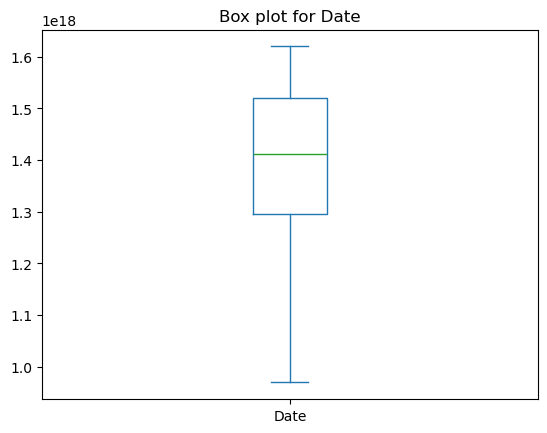

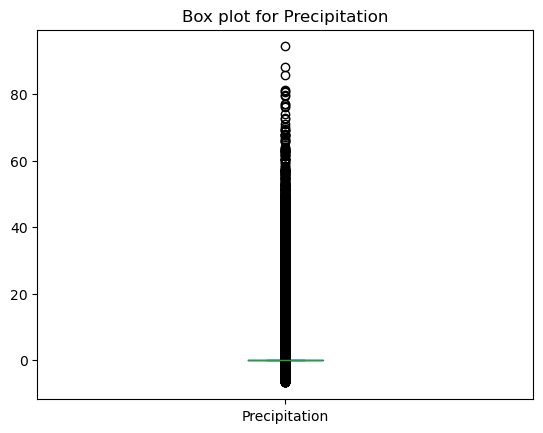

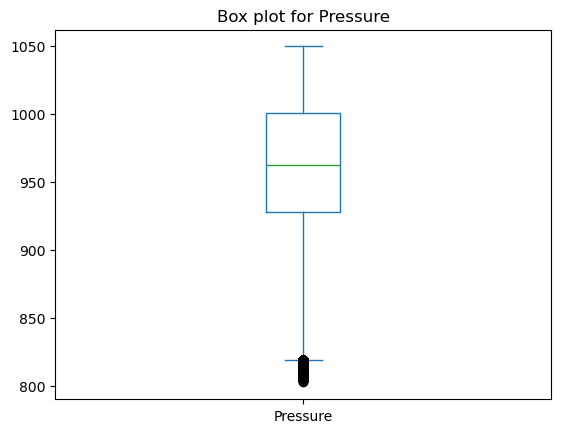

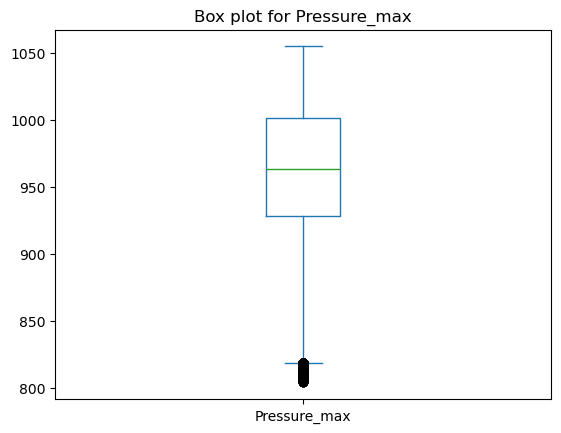

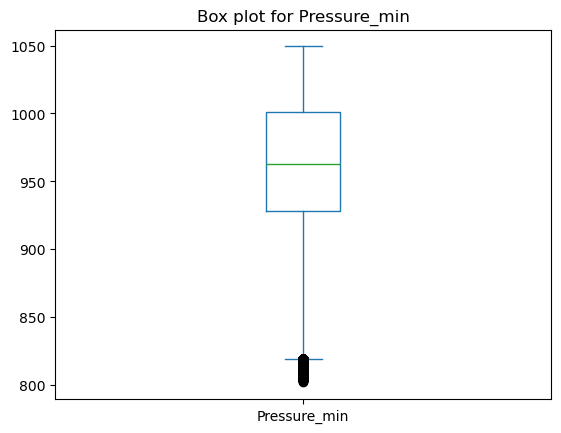

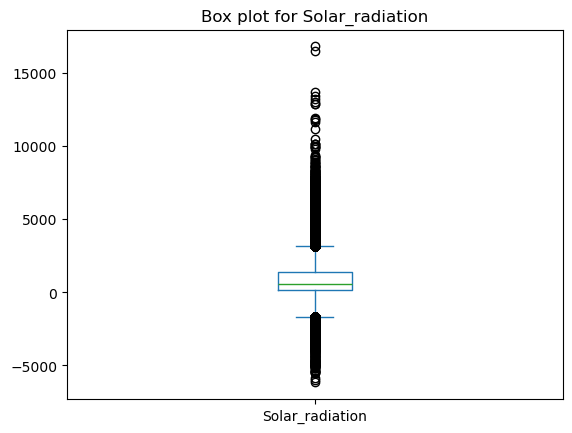

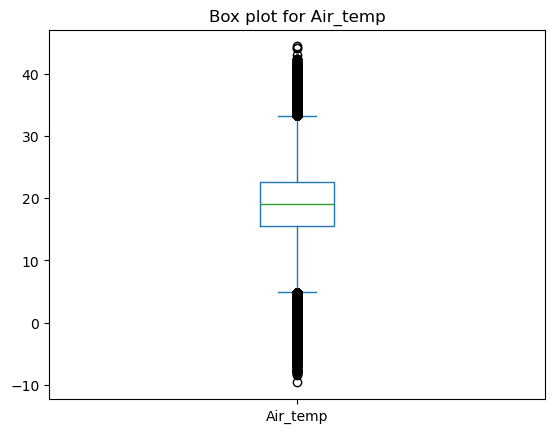

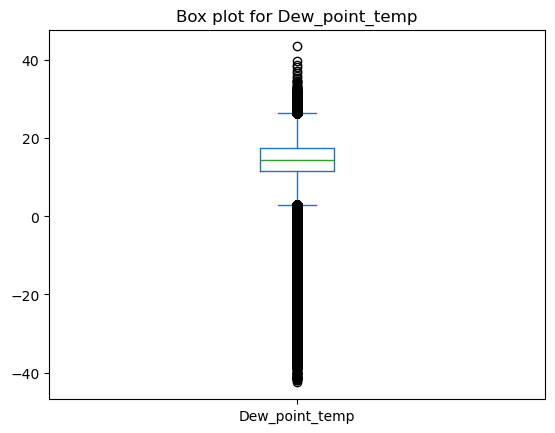

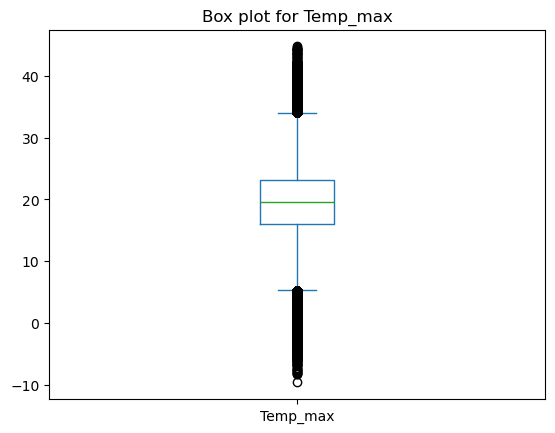

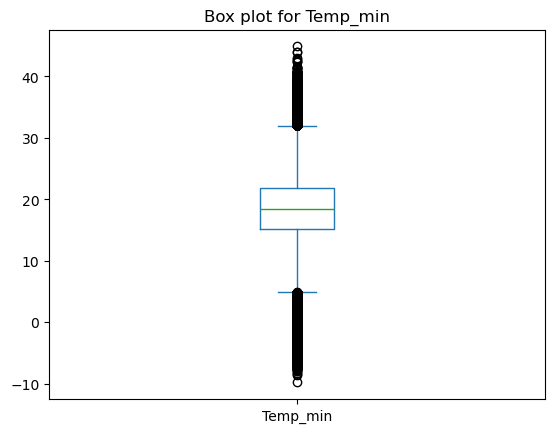

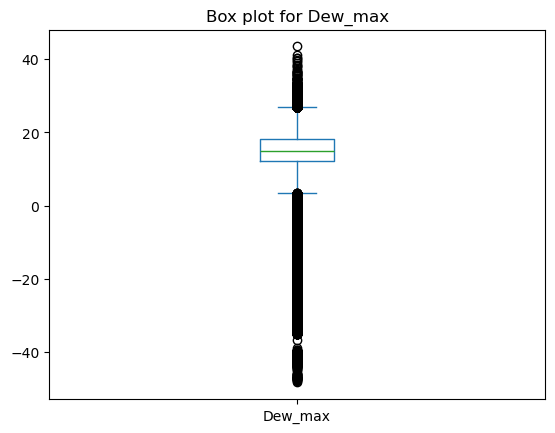

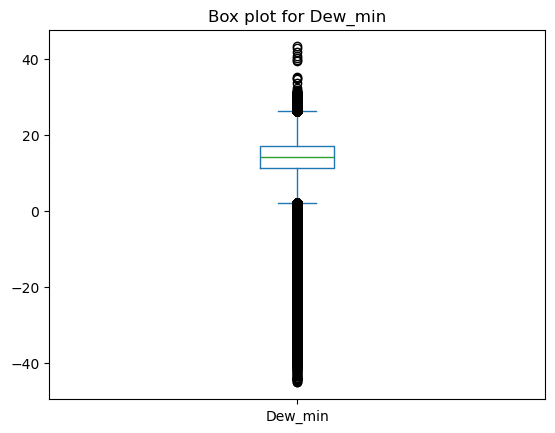

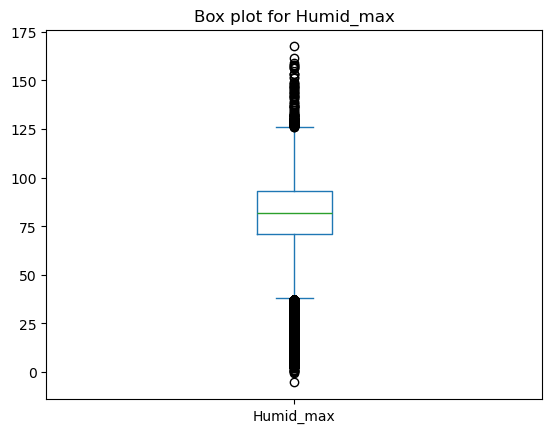

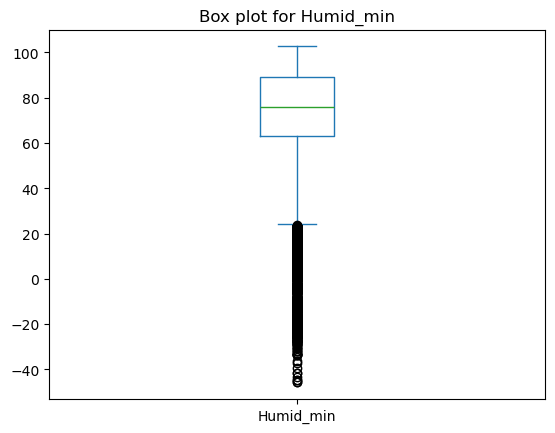

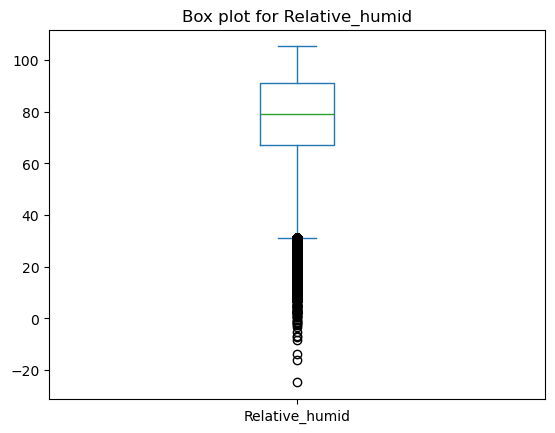

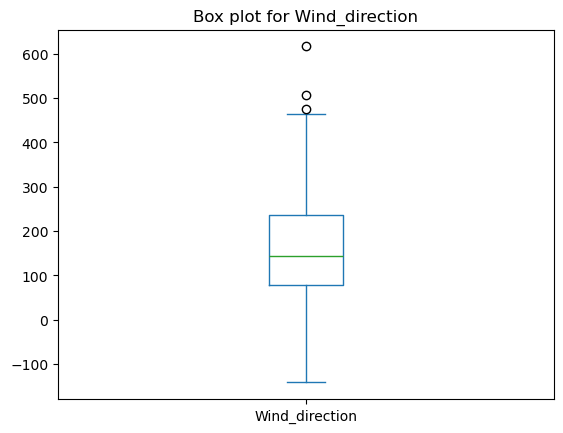

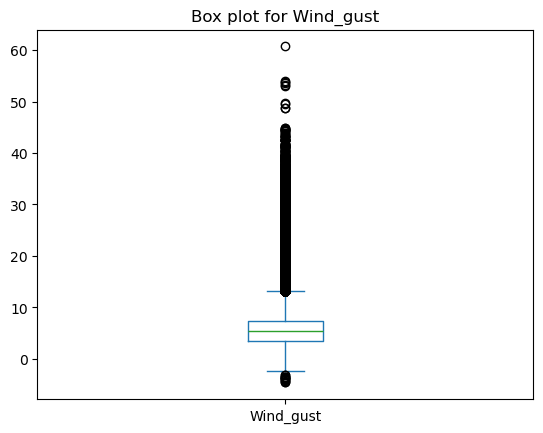

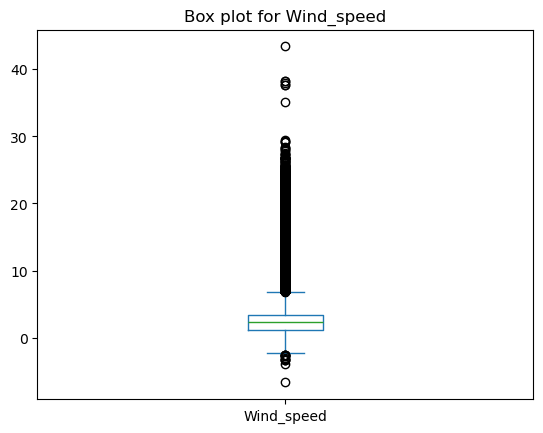

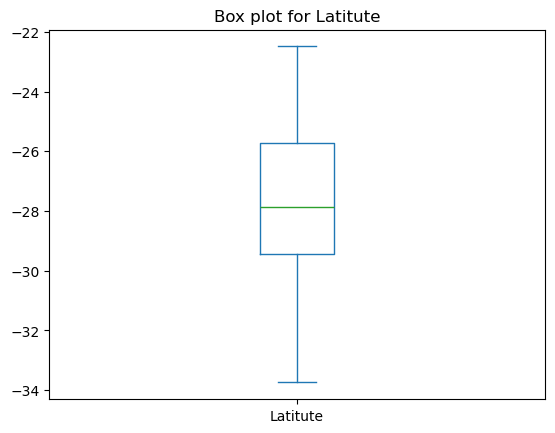

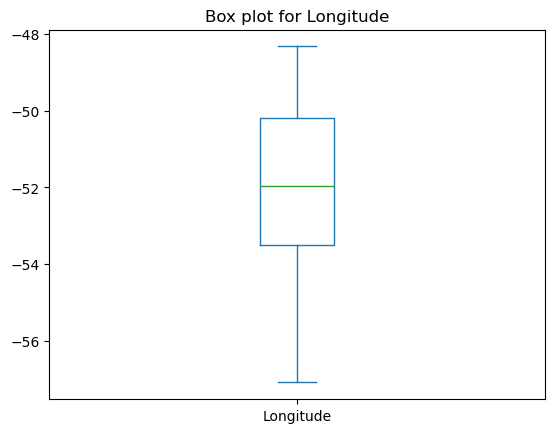

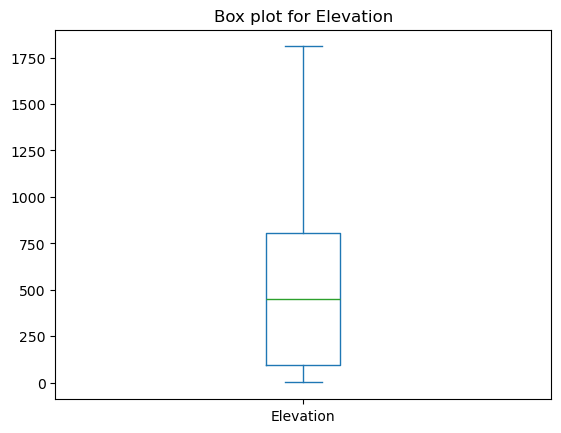

Outliers in Date:
                Date  Precipitation     Pressure  Pressure_max  Pressure_min  \
0       9.695808e+17       5.252234   975.172203    991.541605    984.475845   
1       9.695808e+17       5.252234   975.172203    991.541605    984.475845   
2       9.695808e+17       5.252234   975.172203    991.541605    984.475845   
3       9.695808e+17       0.000000  1013.900000   1014.200000   1013.200000   
4       9.695808e+17       0.000000  1014.400000   1014.700000   1012.200000   
...              ...            ...          ...           ...           ...   
240018  1.130544e+18       3.815750   971.057730    982.504779    977.330683   
240019  1.130544e+18       0.000000  1003.600000   1003.600000   1003.500000   
240020  1.130544e+18       0.000000  1003.800000   1003.900000   1003.600000   
240021  1.130544e+18       0.000000  1003.900000   1003.900000   1003.800000   
240022  1.130544e+18       0.000000  1004.700000   1004.700000   1003.900000   

        Solar_radiati

In [73]:
import pandas as pd
import matplotlib.pyplot as plt


outliers_dict = {}
initial_row_count = df_iterative.shape[0]

for col in column_list:  # Menggunakan column_list
    # Menghitung mean dan standar deviasi
    mean = df_iterative[col].mean()
    std_dev = df_iterative[col].std()

    # Menentukan batas untuk outlier
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev

    # Mengidentifikasi outlier
    outliers = df_iterative[(df_iterative[col] < lower_bound) | (df_iterative[col] > upper_bound)]
    outliers_dict[col] = outliers

    # Plot box plot untuk kolom
    df_iterative[col].plot.box()
    plt.title(f'Box plot for {col}')
    plt.show()

# Print outliers for each column
for col, outlier_data in outliers_dict.items():
    print(f"Outliers in {col}:")
    print(outlier_data)

In [74]:
# Hapus outliers
for col in column_list:
    mean = df_iterative[col].mean()
    std_dev = df_iterative[col].std()
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev
    df_iterative = df_iterative[(df_iterative[col] >= lower_bound) & (df_iterative[col] <= upper_bound)]

print("DataFrame setelah membuang outliers:")
print(df_iterative)

DataFrame setelah membuang outliers:
                  Date  Precipitation  Pressure  Pressure_max  Pressure_min  \
187463    1.130630e+18            0.0    1017.3        1017.3        1016.9   
187465    1.130630e+18            0.0    1018.0        1018.0        1017.6   
187466    1.130630e+18            0.0    1018.1        1018.1        1018.0   
187467    1.130630e+18            0.0    1017.8        1018.1        1017.8   
187468    1.130630e+18            0.0    1017.5        1017.8        1017.5   
...                ...            ...       ...           ...           ...   
10284872  1.619741e+18            0.0     927.6         927.6         927.3   
10284873  1.619741e+18            0.0     928.1         928.1         927.6   
10284874  1.619741e+18            0.0     928.8         928.8         928.1   
10284875  1.619741e+18            0.0     929.1         929.1         928.8   
10284876  1.619741e+18            0.0     929.3         929.4         929.0   

          Sola

In [75]:
# Print jumlah baris setelah menghapus outliers
final_row_count = df_iterative.shape[0]
print(f"Jumlah baris setelah menghapus outliers: {final_row_count}")

# Hitung jumlah baris yang dihapus
rows_removed = initial_row_count - final_row_count
print(f"Jumlah baris yang dihapus: {rows_removed}")

print("DataFrame setelah membuang outliers:")
print(df_iterative)

Jumlah baris setelah menghapus outliers: 4998345
Jumlah baris yang dihapus: 5286542
DataFrame setelah membuang outliers:
                  Date  Precipitation  Pressure  Pressure_max  Pressure_min  \
187463    1.130630e+18            0.0    1017.3        1017.3        1016.9   
187465    1.130630e+18            0.0    1018.0        1018.0        1017.6   
187466    1.130630e+18            0.0    1018.1        1018.1        1018.0   
187467    1.130630e+18            0.0    1017.8        1018.1        1017.8   
187468    1.130630e+18            0.0    1017.5        1017.8        1017.5   
...                ...            ...       ...           ...           ...   
10284872  1.619741e+18            0.0     927.6         927.6         927.3   
10284873  1.619741e+18            0.0     928.1         928.1         927.6   
10284874  1.619741e+18            0.0     928.8         928.8         928.1   
10284875  1.619741e+18            0.0     929.1         929.1         928.8   
10284876  

In [76]:
# Buat df_simple
df_simple = df.copy()

# Menggunakan SimpleImputer untuk imputasi
# Misalnya, kita menggunakan strategi 'mean' untuk kolom numerik
imputer_simple = SimpleImputer(strategy='mean')
df_simple = imputer_simple.fit_transform(df_simple)
df_simple = pd.DataFrame(df_simple, columns=df.columns)

print("DataFrame setelah imputasi menggunakan Simple Imputer:")
print(df_simple)

# Mendefinisikan column_list
column_list = df_simple.columns.tolist()

# Mengidentifikasi outlier
outliers_dict = {}
initial_row_count = df_simple.shape[0]

DataFrame setelah imputasi menggunakan Simple Imputer:
                  Date  Precipitation     Pressure  Pressure_max  \
0         9.695808e+17       0.190998   960.634359    960.904101   
1         9.695808e+17       0.190998   960.634359    960.904101   
2         9.695808e+17       0.190998   960.634359    960.904101   
3         9.695808e+17       0.000000  1013.900000   1014.200000   
4         9.695808e+17       0.000000  1014.400000   1014.700000   
...                ...            ...          ...           ...   
10284882  1.619741e+18       0.000000   925.600000    926.000000   
10284883  1.619741e+18       0.000000   925.400000    925.600000   
10284884  1.619741e+18       0.000000   925.400000    925.400000   
10284885  1.619741e+18       0.000000   925.600000    925.600000   
10284886  1.619741e+18       0.000000   926.000000    926.000000   

          Pressure_min  Solar_radiation   Air_temp  Dew_point_temp   Temp_max  \
0           960.356875      1254.482726  18.961

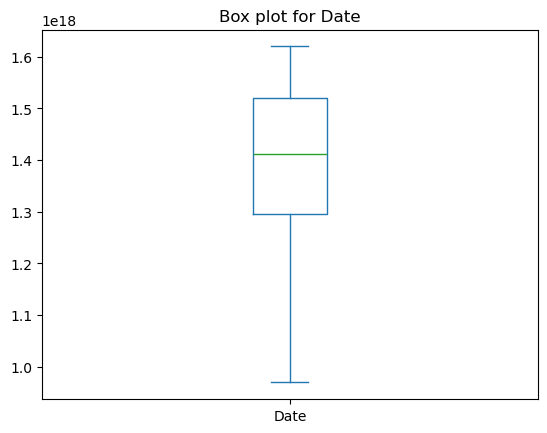

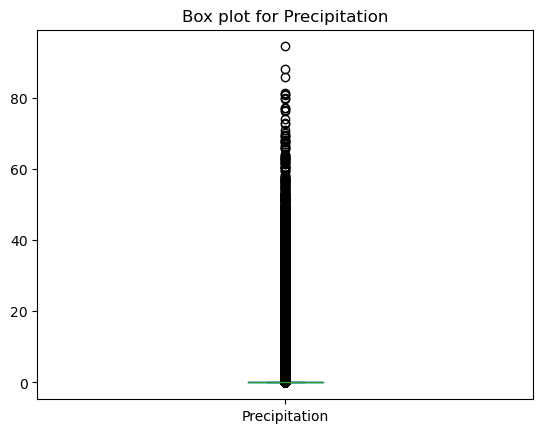

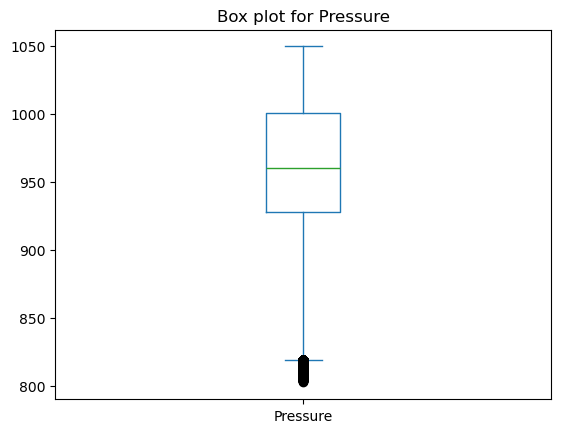

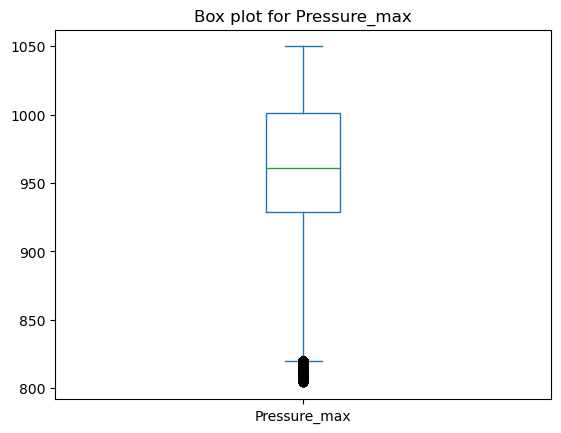

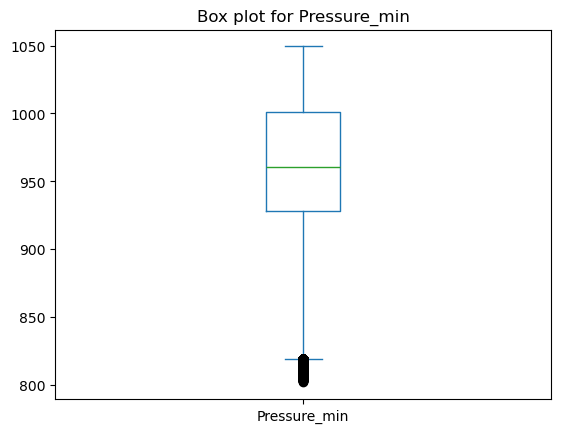

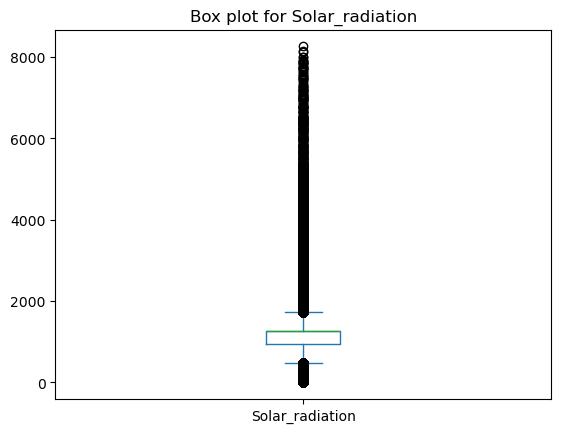

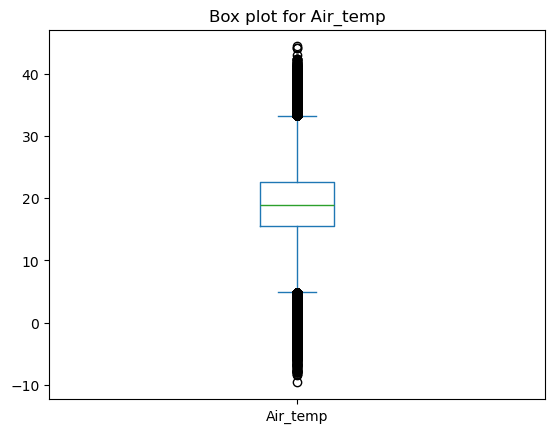

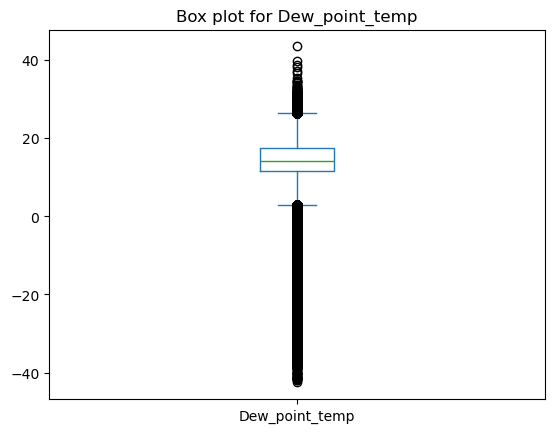

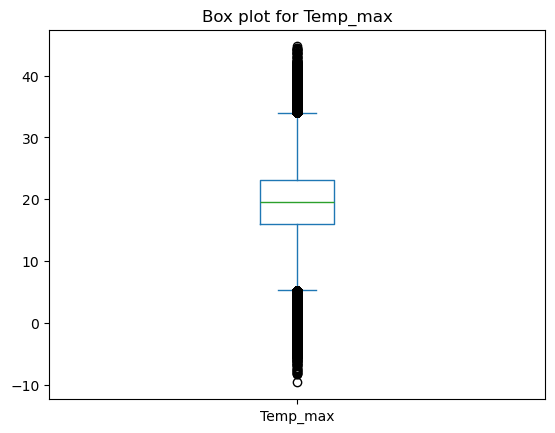

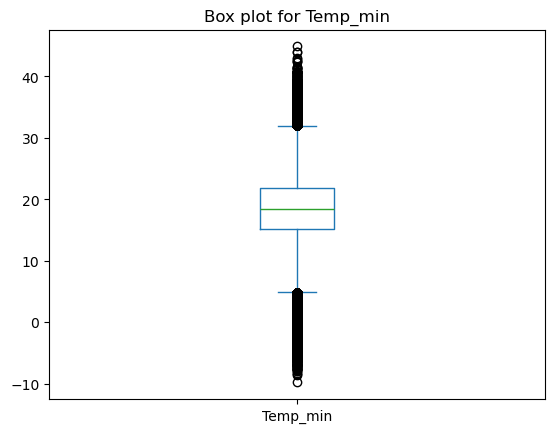

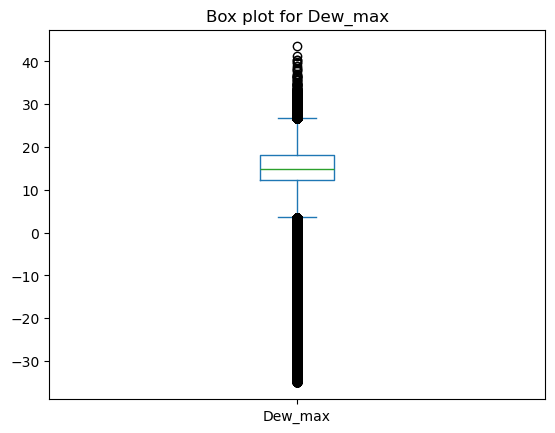

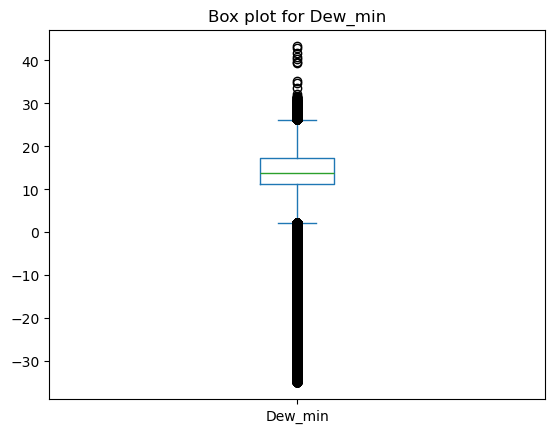

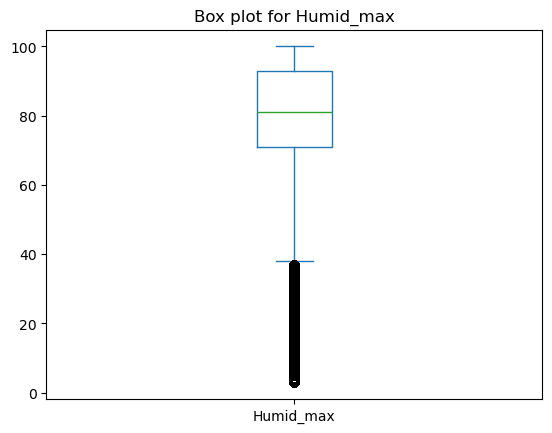

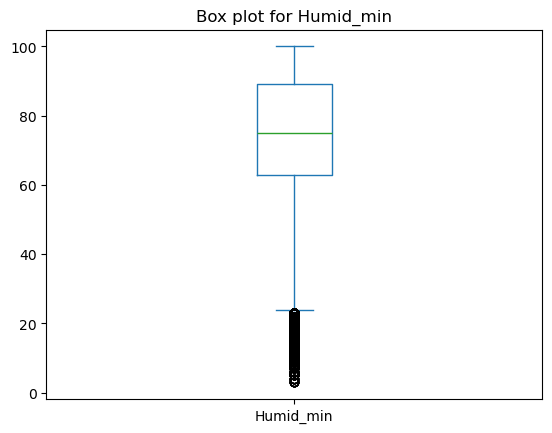

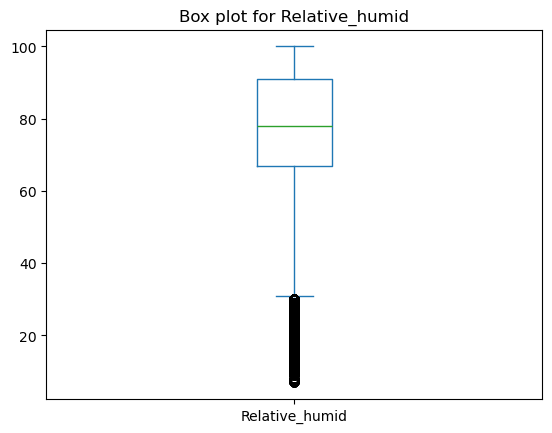

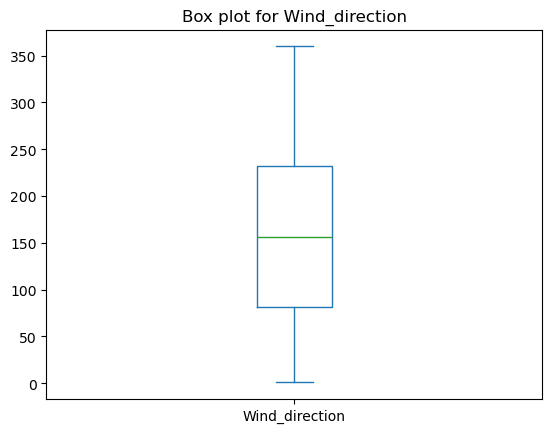

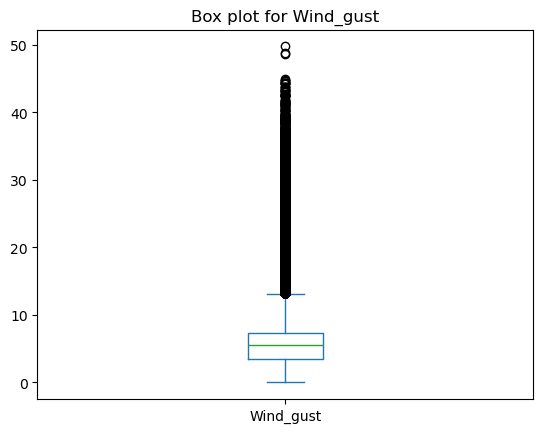

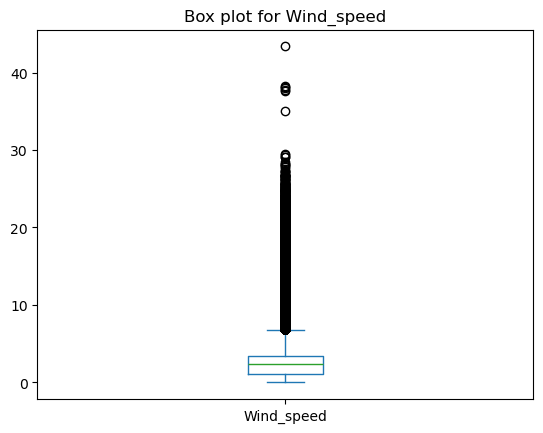

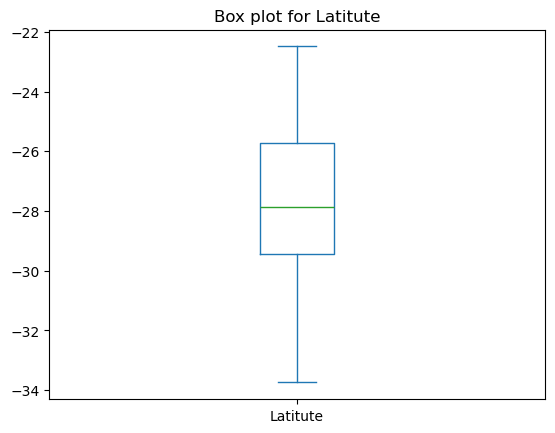

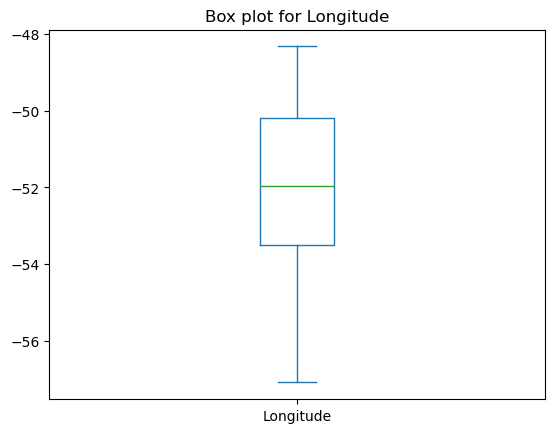

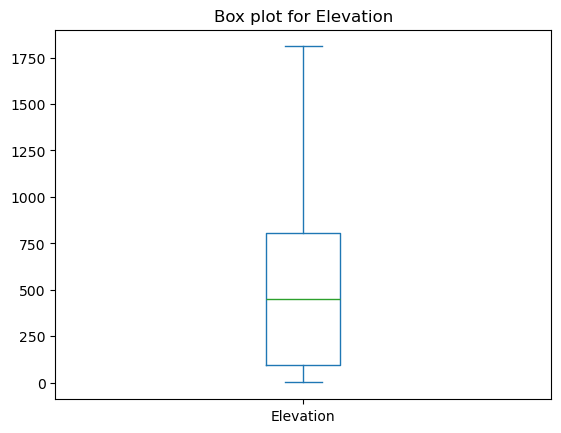

In [77]:
for col in column_list:
    # Menghitung mean dan standar deviasi
    mean = df_simple[col].mean()
    std_dev = df_simple[col].std()

    # Menentukan batas untuk outlier
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev

    # Mengidentifikasi outlier
    outliers = df_simple[(df_simple[col] < lower_bound) | (df_simple[col] > upper_bound)]
    outliers_dict[col] = outliers

    # Plot box plot untuk kolom
    df_simple[col].plot.box()
    plt.title(f'Box plot for {col}')
    plt.show()


In [78]:
# Mencetak outlier untuk setiap kolom
for col, outlier_data in outliers_dict.items():
    print(f"Outliers in {col}:")
    print(outlier_data)

# Hapus outliers dari df_simple
for col in column_list:
    mean = df_simple[col].mean()
    std_dev = df_simple[col].std()
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev
    df_simple = df_simple[(df_simple[col] >= lower_bound) & (df_simple[col] <= upper_bound)]

# Print jumlah baris setelah menghapus outliers
final_row_count = df_simple.shape[0]
print(f"Jumlah baris setelah menghapus outliers: {final_row_count}")

# Hitung jumlah baris yang dihapus
rows_removed = initial_row_count - final_row_count
print(f"Jumlah baris yang dihapus: {rows_removed}")

print("DataFrame setelah membuang outliers:")
print(df_simple)

Outliers in Date:
                Date  Precipitation     Pressure  Pressure_max  Pressure_min  \
0       9.695808e+17       0.190998   960.634359    960.904101    960.356875   
1       9.695808e+17       0.190998   960.634359    960.904101    960.356875   
2       9.695808e+17       0.190998   960.634359    960.904101    960.356875   
3       9.695808e+17       0.000000  1013.900000   1014.200000   1013.200000   
4       9.695808e+17       0.000000  1014.400000   1014.700000   1012.200000   
...              ...            ...          ...           ...           ...   
240018  1.130544e+18       0.190998   960.634359    960.904101    960.356875   
240019  1.130544e+18       0.000000  1003.600000   1003.600000   1003.500000   
240020  1.130544e+18       0.000000  1003.800000   1003.900000   1003.600000   
240021  1.130544e+18       0.000000  1003.900000   1003.900000   1003.800000   
240022  1.130544e+18       0.000000  1004.700000   1004.700000   1003.900000   

        Solar_radiati